In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
# Procedemos a la lectura de los archivos CSV
df_fiat = pd.read_csv('../data/fiat.csv')
df_crypto = pd.read_csv('../data/crypto.csv')
df_crypto_meme = pd.read_csv('../data/crypto_meme.csv')
df_crypto_ia = pd.read_csv('../data/crypto_ia.csv')

In [5]:
# Convertimos las fechas en datetime para hacerlo mas manejables y eliminar las zonas horarias
df_fiat['Date'] = pd.to_datetime(df_fiat['Date'],utc=True)
df_fiat['Date'] = df_fiat['Date'].dt.date
df_crypto['Date'] = pd.to_datetime(df_crypto['Date'],utc=True)
df_crypto['Date'] = df_crypto['Date'].dt.date
df_crypto_meme['Date'] = pd.to_datetime(df_crypto_meme['Date'],utc=True)
df_crypto_meme['Date'] = df_crypto_meme['Date'].dt.date
df_crypto_ia['Date'] = pd.to_datetime(df_crypto_ia['Date'],utc=True)
df_crypto_ia['Date'] = df_crypto_ia['Date'].dt.date

# Usamos la fecha como indice
df_fiat.set_index('Date', inplace=True)
df_crypto.set_index('Date', inplace=True)
df_crypto_meme.set_index('Date', inplace=True)
df_crypto_ia.set_index('Date', inplace=True)

In [6]:
# Unimos los dataframe en uno solo usando la fecha como clave
df_all = df_fiat
df_all = pd.merge(df_all, df_crypto, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_crypto_meme, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_crypto_ia, left_index=True, right_index=True)

In [7]:
# Separamos nuevamente los dataframes para asi tener la misma cantidad de columnas y poder usar los grupos de forma sencilla
df_fiat_r = df_all[df_fiat.columns]
df_crypto_r = df_all[df_crypto.columns]
df_crypto_meme_r = df_all[df_crypto_meme.columns]
df_crypto_ia_r = df_all[df_crypto_ia.columns]
# Le añadimos la r para reconocer que son los reducidos

In [8]:
# Vamos a ver las descripciones por grupo para ver como se comportan los datos que tenemos
df_fiat_r.describe()

,Euro,Libra Esterlina,Yen Japones,Dolar Canadiense,Dolar Australiano
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,1.081149,1.269714,0.006735,0.729478,0.653793
std,0.022754,0.027319,0.000273,0.017293,0.017546
min,1.024443,1.207846,0.006187,0.679486,0.595529
25%,1.069833,1.253329,0.006536,0.722189,0.641439
50%,1.083576,1.268499,0.006706,0.733192,0.655798
75%,1.094260,1.285289,0.006920,0.740812,0.666770
max,1.151278,1.343616,0.007493,0.762631,0.691879


In [9]:
df_crypto_r.describe()

,Bitcoin,Ethereum,XRP,Binance,Solana
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,58420.847980,2532.897320,0.957584,457.097673,115.281106
std,24468.622200,710.141728,0.771304,173.507789,68.302831
min,25124.675781,1472.553101,0.419823,205.229416,14.486572
25%,34029.087891,1862.989685,0.515565,253.695213,32.157025
50%,60759.402344,2417.206299,0.578944,537.865723,133.194580
75%,71877.632812,3201.608276,0.714581,599.598389,164.381638
max,106146.265625,4066.445068,3.298635,739.252747,257.237366


In [10]:
df_crypto_ia_r.describe()

,Bittensor,Near Protocol,Internet Computer,Render,Filecoin
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,309.454459,3.691577,8.066761,5.050882,4.709595
std,192.745859,2.054131,3.783225,2.794137,1.641752
min,34.088188,0.986710,2.900906,1.351481,2.261823
25%,84.531845,1.660218,4.630554,2.420085,3.530761
50%,304.476746,3.401886,7.684101,4.510126,4.392999
75%,455.346848,5.217956,11.157787,7.137421,5.449012
max,730.255249,8.882498,19.050114,11.872925,11.470860


In [11]:
df_crypto_meme_r.describe()

,Dogecoin,Shiba Inu,Floki,Oficial Trump,Bonk
count,531.000000,531.000000,531.000000,531.000000,5.310000e+02
mean,0.143774,0.000015,0.000101,0.002135,1.553803e-05
std,0.093423,0.000007,0.000078,0.003222,1.238038e-05
min,0.057897,0.000007,0.000015,0.000027,0.000000e+00
25%,0.076368,0.000009,0.000031,0.000570,1.000000e-06
50%,0.107581,0.000013,0.000077,0.001080,1.600000e-05
75%,0.168618,0.000019,0.000165,0.002749,2.400000e-05
max,0.435709,0.000036,0.000320,0.035543,5.400000e-05


In [12]:
# Creo una funcion para la visualización de datos con lineas de tendencia
def plot_data(df, title, y_label = "Precio en USD", y_limit=None):
    plt.figure(figsize=(12, 6))
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel(y_label)
    if y_limit:
        plt.ylim(y_limit)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../img/{title}.png') # Guardar la figura
    plt.show()


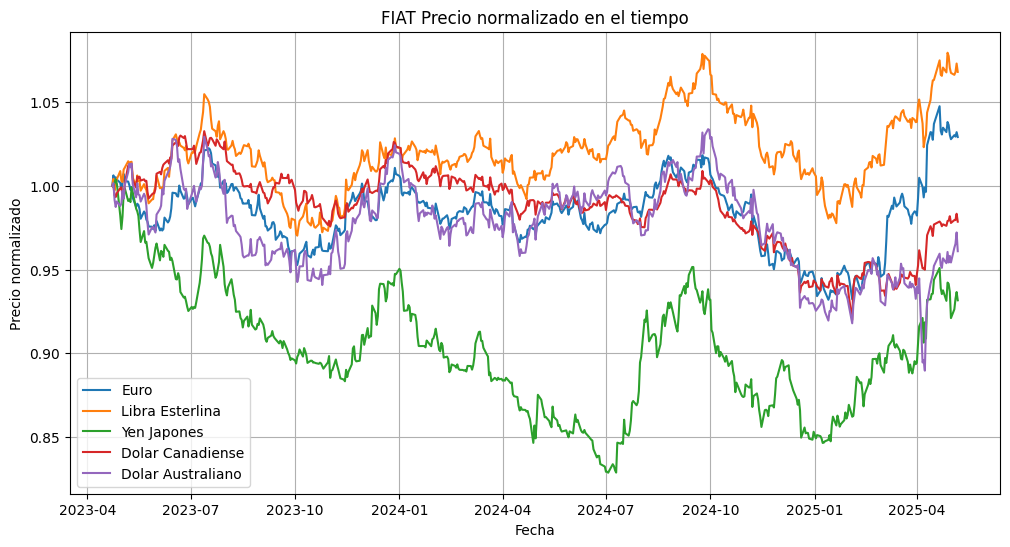

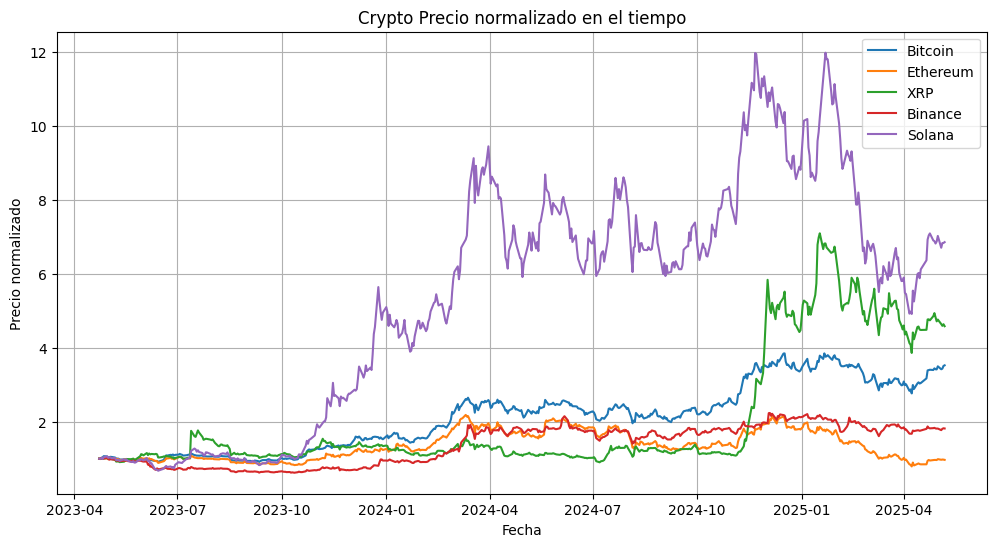

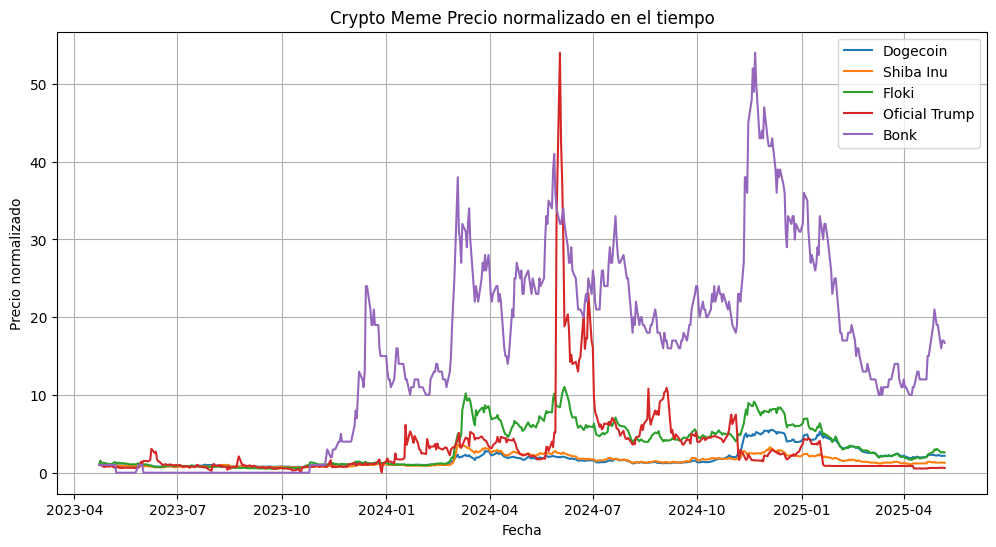

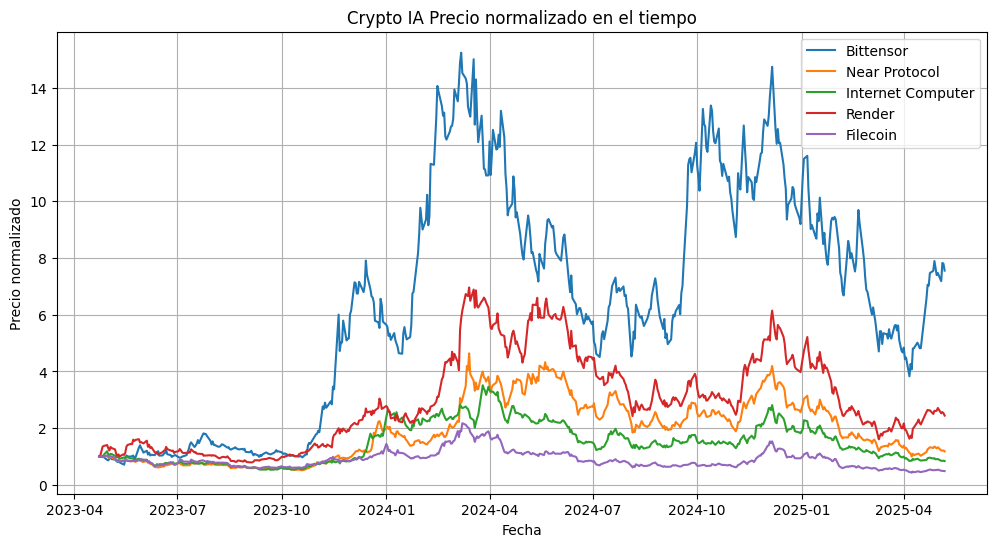

In [13]:
# Debido a la diferencia en los precios uso los precios normalizados para poder hacer la comparativa entre los precios
df_fiat_norm = df_fiat_r / df_fiat_r.iloc[0]
plot_data(df_fiat_norm, 'FIAT Precio normalizado en el tiempo', y_label='Precio normalizado')

# Hago lo mismo con los precios de las criptomonedas
df_crypto_norm = df_crypto_r / df_crypto_r.iloc[0]
plot_data(df_crypto_norm, 'Crypto Precio normalizado en el tiempo', y_label='Precio normalizado')

# Hago lo mismo con los precios de las criptomonedas meme
df_crypto_meme_norm = df_crypto_meme_r / df_crypto_meme_r.iloc[0]
plot_data(df_crypto_meme_norm, 'Crypto Meme Precio normalizado en el tiempo', y_label='Precio normalizado')

# Hago lo mismo con los precios de las criptomonedas IA
df_crypto_ia_norm = df_crypto_ia_r / df_crypto_ia_r.iloc[0]
plot_data(df_crypto_ia_norm, 'Crypto IA Precio normalizado en el tiempo', y_label='Precio normalizado')

In [14]:
# Creo una funcion para que dibuje la matriz de correlacion
def corr_matrix(df, title):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.savefig(f'../img/{title}.png') # Guardar la figura
    plt.show()



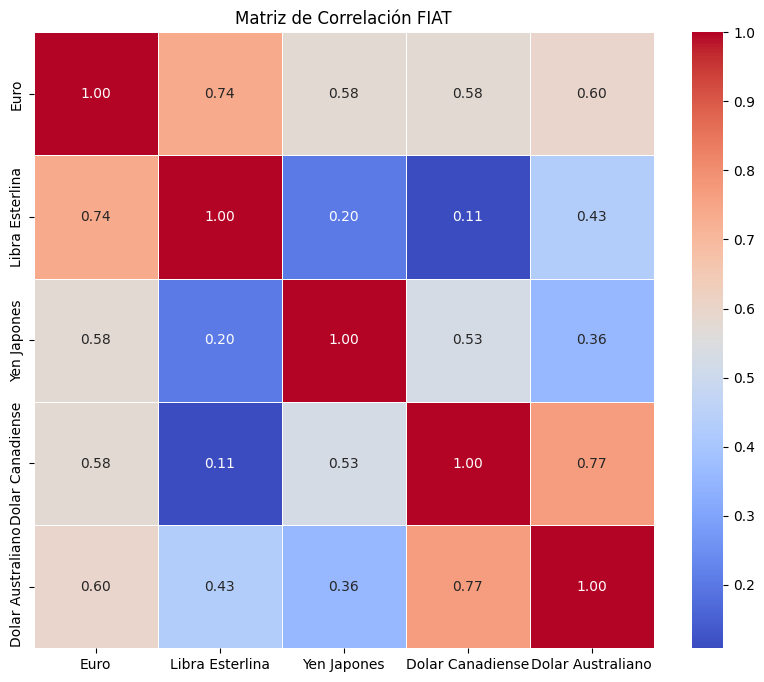

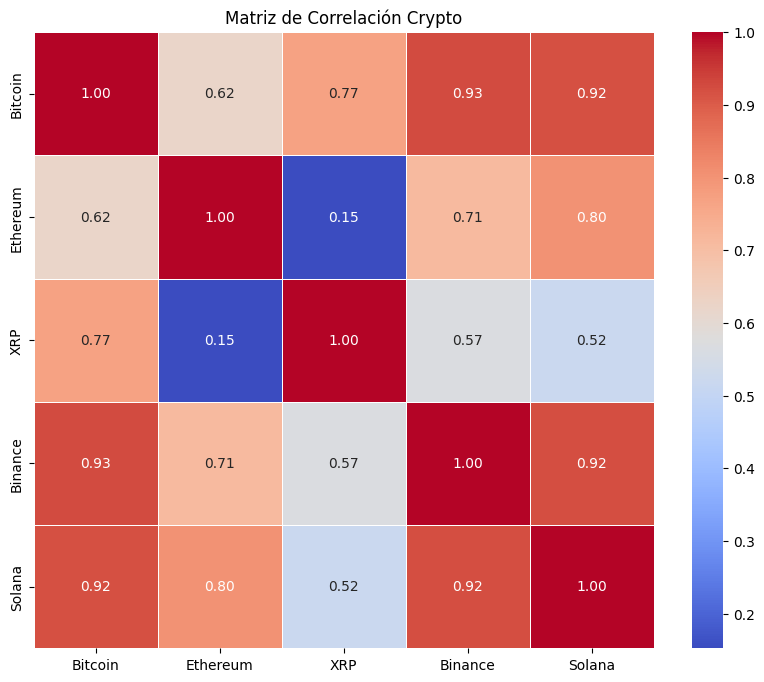

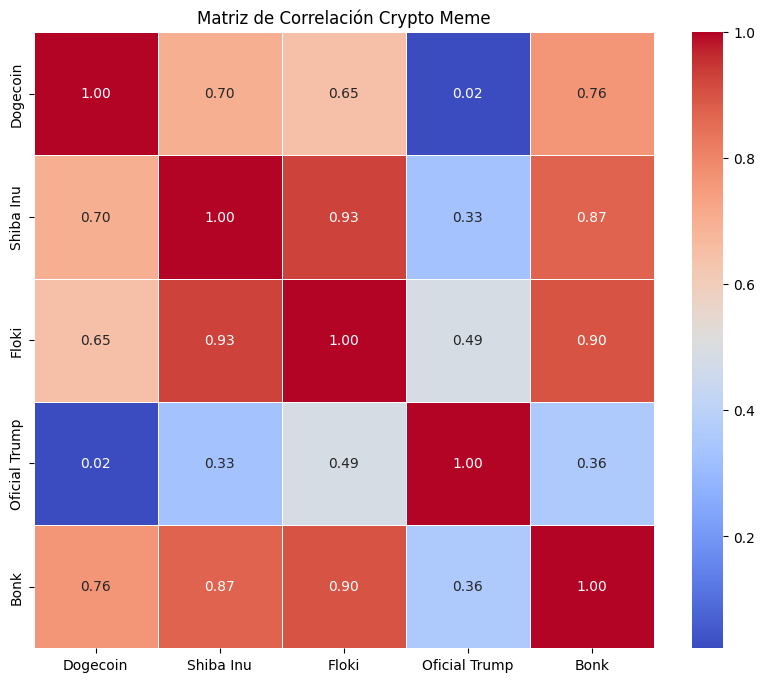

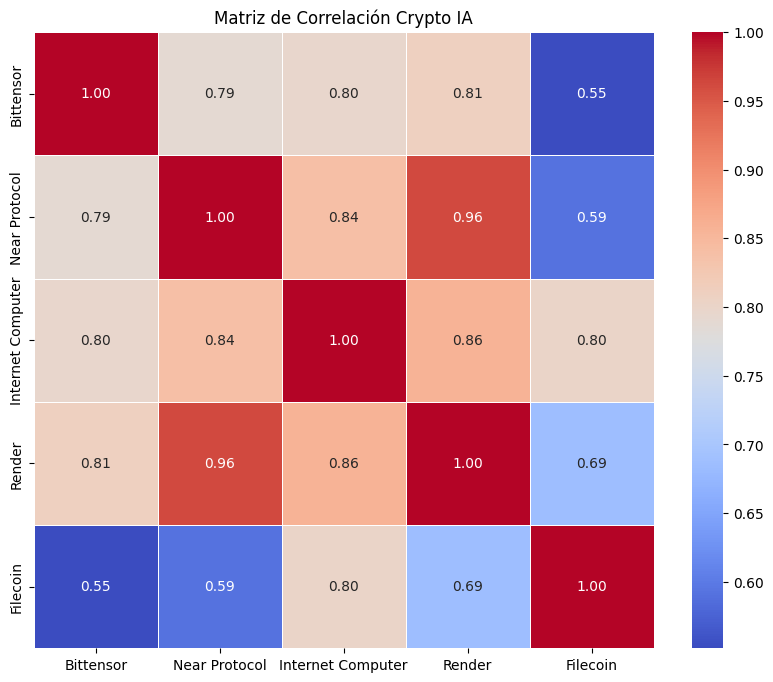

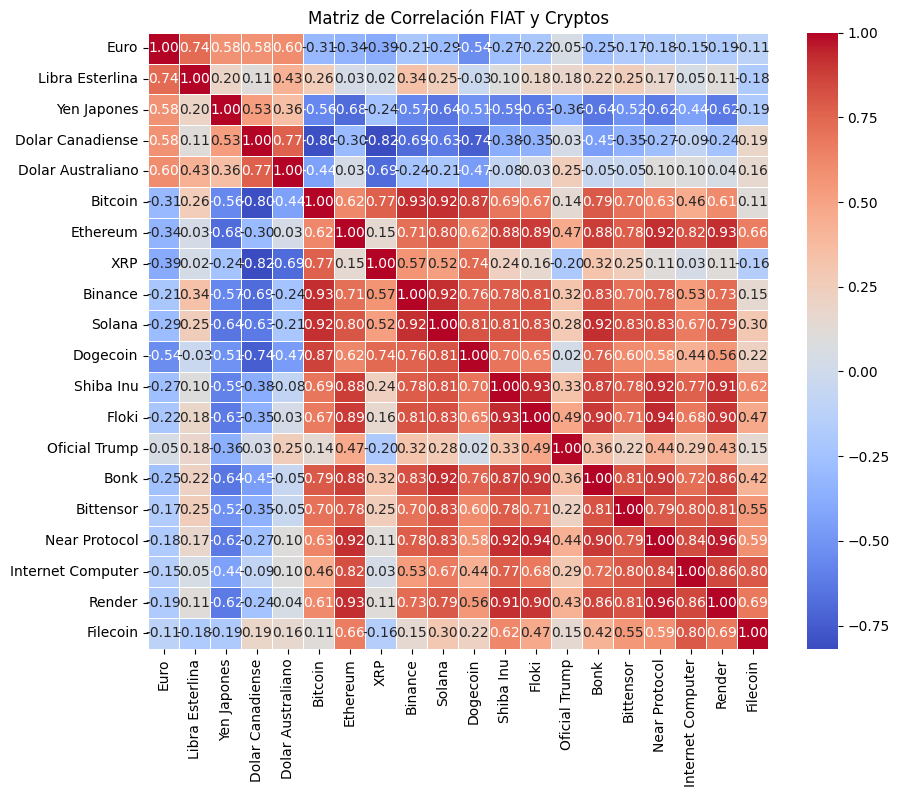

In [15]:
corr_matrix(df_fiat_r, 'Matriz de Correlación FIAT')
corr_matrix(df_crypto_r, 'Matriz de Correlación Crypto')
corr_matrix(df_crypto_meme_r, 'Matriz de Correlación Crypto Meme')
corr_matrix(df_crypto_ia_r, 'Matriz de Correlación Crypto IA')

# Tambien veo la correlacion entre todas las monedas
corr_matrix(df_all, 'Matriz de Correlación FIAT y Cryptos')

In [17]:
# Buscamos la magnitud de las correlaciones para saber cuales son los mas correlacionados con otros positiva o negativamente
corr_all = df_all.corr()
corr_all_mag = corr_all.apply(np.linalg.norm, axis=0)
corr_all_mag = corr_all_mag.sort_values(ascending=False)
corr_all_mag 

Solana               3.172958
Bonk                 3.152012
Near Protocol        3.123016
Shiba Inu            3.104930
Ethereum             3.100130
Render               3.093175
Floki                3.067368
Binance              3.019133
Bitcoin              2.965797
Bittensor            2.866179
Dogecoin             2.829090
Internet Computer    2.723030
Yen Japones          2.480730
Dolar Canadiense     2.407244
XRP                  2.108597
Filecoin             2.084067
Euro                 1.913060
Dolar Australiano    1.838214
Oficial Trump        1.641490
Libra Esterlina      1.511233
dtype: float64

In [18]:
# Ahora hacemos lo mismo pero solo con las monedas FIAT
corr_fiat = df_fiat_r.corr()
corr_fiat_mag = corr_fiat.apply(np.linalg.norm, axis=0)
corr_fiat_mag.sort_values(ascending=False, inplace=True)
corr_fiat_mag

Euro                 1.601661
Dolar Australiano    1.504690
Dolar Canadiense     1.488882
Yen Japones          1.335550
Libra Esterlina      1.333284
dtype: float64

In [19]:
matriz_pvalor_yen = {} # Creamos un diccionario para guardar los resultados de la correlacion y el p-valor
# Creamos un dataframe de solo cryptos
df_crypto_all = df_all.drop(columns = df_fiat_r.columns,inplace=False)
# Recorremos las columnas de las criptomonedas y calculamos la correlacion y el p-valor con el yen japones
for i in df_crypto_all.columns:
    corr, p_value = pearsonr(df_fiat_r["Yen Japones"], df_crypto_all[i])
    matriz_pvalor_yen[i] = (corr, p_value)

# Convertimos el diccionario en un dataframe para poder verlo mejor    
matriz_pvalor_yen_df = pd.DataFrame(matriz_pvalor_yen, index=['Correlation', 'P-Value']).T
matriz_pvalor_yen_df

,Correlation,P-Value
Bitcoin,-0.559030,5.584455e-45
Ethereum,-0.683873,1.889333e-74
XRP,-0.236840,3.322697e-08
Binance,-0.566225,2.402200e-46
Solana,-0.643007,2.791292e-63
Dogecoin,-0.507515,4.172468e-36
Shiba Inu,-0.586342,2.381586e-50
Floki,-0.625071,6.730552e-59
Oficial Trump,-0.363703,4.736749e-18
Bonk,-0.635173,2.485484e-61


In [20]:
#Realizamos lo mismo que en la accion anterior pero solo con Solana que es la moneda con mas relacion
matriz_pvalor_sol = {}

for i in df_crypto_all.columns:
    corr, p_value = pearsonr(df_crypto_all["Solana"], df_crypto_all[i])
    matriz_pvalor_sol[i] = (corr, p_value)
    
matriz_pvalor_sol_df = pd.DataFrame(matriz_pvalor_sol, index=['Correlation', 'P-Value']).T
matriz_pvalor_sol_df

,Correlation,P-Value
Bitcoin,0.918803,1.025719e-215
Ethereum,0.803961,1.702356e-121
XRP,0.516931,1.289086e-37
Binance,0.921515,1.862009e-219
Solana,1.000000,0.000000e+00
Dogecoin,0.813795,8.673057e-127
Shiba Inu,0.812306,5.748134e-126
Floki,0.825337,2.044401e-133
Oficial Trump,0.277457,7.683755e-11
Bonk,0.922881,2.158220e-221
